<a href="https://colab.research.google.com/github/gracesstew/SPICE-2024/blob/main/Copy_of_waveheight_51202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wave Height Predictions with ARIMA

## Introduction


The goal is to use machine learning to build a time-series model that can be used to predict wave height measurements for the selected buoy area. We'll be building an ARIMA model.

The dataset comes from the [National Data Buoy Center](https://www.ndbc.noaa.gov/).

The buoy used for this example is Buoy #[51101](https://www.ndbc.noaa.gov/station_page.php?station=51101), which is located Northwest of Kauai, Hawaii.

Testing.

### ARIMA

You can read this article for more info.
https://medium.com/analytics-vidhya/arima-for-dummies-ba761d59a051


# Imports and Data

## Imports

The below code chunk loads in all your packages and imports, make sure to run this every time you start your session.

Packages include all the tools you need to successfully run all your code and analysis.

In [1]:
!pip install statsmodels
!pip install pmdarima
!pip install seaborn

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.1 MB/s eta 0:00:00


## Data

To load in our data, we use the pandas function read_csv to get the data directly from the National Data Buoy Center and are assigning it to the variable called *df1*.

A variable is a place/object where we can store information.

In [ ]:
#df_17 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2017.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data

In [2]:
df_23 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2023.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
df_22 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2022.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
#df_21 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2021.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
#df_20 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2020.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
#df_19 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51202h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)

In [ ]:
df_17.head() # looking at first 5 rows

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2017,01,01,00,04,999,99.0,99.0,2.23,9.88,7.04,19,9999.0,999.0,24.5,999.0,99.0,99.00
2,2017,01,01,00,34,999,99.0,99.0,2.40,9.88,7.06,20,9999.0,999.0,24.5,999.0,99.0,99.00
3,2017,01,01,01,04,999,99.0,99.0,2.12,9.88,6.63,34,9999.0,999.0,24.5,999.0,99.0,99.00
4,2017,01,01,01,34,999,99.0,99.0,2.19,9.88,6.63,24,9999.0,999.0,24.5,999.0,99.0,99.00


# Exploring the Data

For this project, the target variable we'll focus on is WVHT (wave height in meters).

In [ ]:
df_17.info() # looking at basic information about your variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17006 entries, 0 to 17005
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #YY     17006 non-null  object
 1   MM      17006 non-null  object
 2   DD      17006 non-null  object
 3   hh      17006 non-null  object
 4   mm      17006 non-null  object
 5   WDIR    17006 non-null  object
 6   WSPD    17006 non-null  object
 7   GST     17006 non-null  object
 8   WVHT    17006 non-null  object
 9   DPD     17006 non-null  object
 10  APD     17006 non-null  object
 11  MWD     17006 non-null  object
 12  PRES    17006 non-null  object
 13  ATMP    17006 non-null  object
 14  WTMP    17006 non-null  object
 15  DEWP    17006 non-null  object
 16  VIS     17006 non-null  object
 17  TIDE    17006 non-null  object
dtypes: object(18)
memory usage: 2.3+ MB


From the above information, we learn that the dataset currently has 8,645 rows and 18 columns.

In [ ]:
df_17.head() # looking at the first five rows of your data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2017,01,01,00,04,999,99.0,99.0,2.23,9.88,7.04,19,9999.0,999.0,24.5,999.0,99.0,99.00
2,2017,01,01,00,34,999,99.0,99.0,2.40,9.88,7.06,20,9999.0,999.0,24.5,999.0,99.0,99.00
3,2017,01,01,01,04,999,99.0,99.0,2.12,9.88,6.63,34,9999.0,999.0,24.5,999.0,99.0,99.00
4,2017,01,01,01,34,999,99.0,99.0,2.19,9.88,6.63,24,9999.0,999.0,24.5,999.0,99.0,99.00


Let's look to see if we have NA values (missing values) in our dataset.

We're making another variable called *na_values*, to see if any column has NA values.

In [ ]:
na_values = pd.DataFrame(df_22.isna().sum()) # looking at na values
na_values # typing in the variable name prints it out for you

,0
#YY,0
MM,0
DD,0
hh,0
mm,0
WDIR,0
WSPD,0
GST,0
WVHT,0
DPD,0


In [3]:
#checking how many rows the variable has
print(len(df_23)) #2023
print(len(df_22)) #2022
#print(len(df_21)) #2021
#print(len(df_20)) #2020
#print(len(df_19)) #2019

17506
15815


# Data Cleaning

We need to clean our data to help our analysis run smoother and format it properly.

We'll be deleting the first two rows of our dataset as it just repeats the column names and has a row from 2016, and assigning it to a new variable called df1_clean.

In [4]:
df23_clean = df_23.iloc[1:] # dropping the first row
df23_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2023,01,01,00,26,999,99.0,99.0,1.21,9.09,6.35,38,9999.0,999.0,25.4,999.0,99.0,99.00
2,2023,01,01,00,56,999,99.0,99.0,1.23,8.33,6.20,65,9999.0,999.0,25.3,999.0,99.0,99.00
3,2023,01,01,01,26,999,99.0,99.0,1.20,9.09,6.19,7,9999.0,999.0,25.4,999.0,99.0,99.00
4,2023,01,01,01,56,999,99.0,99.0,1.22,12.50,6.19,342,9999.0,999.0,25.4,999.0,99.0,99.00
5,2023,01,01,02,26,999,99.0,99.0,1.24,8.33,6.19,20,9999.0,999.0,25.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,2023,12,31,21,56,999,99.0,99.0,1.48,12.50,7.64,34,9999.0,999.0,24.9,999.0,99.0,99.00
17502,2023,12,31,22,26,999,99.0,99.0,1.55,12.50,7.37,18,9999.0,999.0,24.9,999.0,99.0,99.00
17503,2023,12,31,22,56,999,99.0,99.0,1.55,12.50,7.48,23,9999.0,999.0,24.9,999.0,99.0,99.00
17504,2023,12,31,23,26,999,99.0,99.0,1.45,16.67,7.12,350,9999.0,999.0,24.9,999.0,99.0,99.00


In [5]:
df22_clean = df_22.iloc[1:] # dropping the first row
df22_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2022,02,04,22,56,999,99.0,99.0,1.69,10.53,8.47,58,9999.0,999.0,25.3,999.0,99.0,99.00
2,2022,02,04,23,26,999,99.0,99.0,1.66,10.53,8.51,49,9999.0,999.0,25.2,999.0,99.0,99.00
3,2022,02,04,23,56,999,99.0,99.0,1.65,9.88,8.26,68,9999.0,999.0,25.3,999.0,99.0,99.00
4,2022,02,05,00,26,999,99.0,99.0,1.66,9.88,8.19,61,9999.0,999.0,25.2,999.0,99.0,99.00
5,2022,02,05,00,56,999,99.0,99.0,1.56,9.88,7.99,59,9999.0,999.0,25.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,2022,12,31,21,56,999,99.0,99.0,1.19,8.33,5.47,89,9999.0,999.0,25.2,999.0,99.0,99.00
15811,2022,12,31,22,26,999,99.0,99.0,1.24,13.33,5.87,346,9999.0,999.0,25.3,999.0,99.0,99.00
15812,2022,12,31,22,56,999,99.0,99.0,1.21,9.09,5.99,33,9999.0,999.0,25.3,999.0,99.0,99.00
15813,2022,12,31,23,26,999,99.0,99.0,1.28,12.50,6.37,343,9999.0,999.0,25.3,999.0,99.0,99.00


In [ ]:
df21_clean = df_21.iloc[1:] # dropping the first row
df21_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2021,01,01,00,26,999,99.0,99.0,2.50,9.88,6.65,69,9999.0,999.0,25.8,999.0,99.0,99.00
2,2021,01,01,00,56,999,99.0,99.0,2.45,7.14,6.57,73,9999.0,999.0,25.8,999.0,99.0,99.00
3,2021,01,01,01,26,999,99.0,99.0,2.39,7.14,6.49,86,9999.0,999.0,25.8,999.0,99.0,99.00
4,2021,01,01,01,56,999,99.0,99.0,2.39,7.14,6.63,87,9999.0,999.0,25.8,999.0,99.0,99.00
5,2021,01,01,02,26,999,99.0,99.0,2.52,9.09,6.62,86,9999.0,999.0,25.8,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,2021,07,18,01,26,999,99.0,99.0,2.06,9.09,5.92,62,9999.0,999.0,26.9,999.0,99.0,99.00
6404,2021,07,18,01,56,999,99.0,99.0,2.06,8.33,5.81,58,9999.0,999.0,26.9,999.0,99.0,99.00
6405,2021,07,18,02,26,999,99.0,99.0,2.05,8.33,5.99,61,9999.0,999.0,26.9,999.0,99.0,99.00
6406,2021,07,18,02,56,999,99.0,99.0,2.20,9.09,6.14,56,9999.0,999.0,26.9,999.0,99.0,99.00


In [ ]:
df20_clean = df_20.iloc[1:] # dropping the first row
df20_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2020,01,01,00,00,999,99.0,99.0,2.74,9.09,6.96,88,9999.0,999.0,25.4,999.0,99.0,99.00
2,2020,01,01,00,30,999,99.0,99.0,2.70,9.09,6.72,82,9999.0,999.0,25.4,999.0,99.0,99.00
3,2020,01,01,01,00,999,99.0,99.0,2.73,9.88,6.51,82,9999.0,999.0,25.4,999.0,99.0,99.00
4,2020,01,01,01,30,999,99.0,99.0,2.99,9.09,6.69,81,9999.0,999.0,25.4,999.0,99.0,99.00
5,2020,01,01,02,00,999,99.0,99.0,2.98,9.09,6.73,85,9999.0,999.0,25.4,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,2020,12,31,21,26,999,99.0,99.0,2.43,6.67,6.28,82,9999.0,999.0,25.8,999.0,99.0,99.00
16710,2020,12,31,21,56,999,99.0,99.0,2.29,6.67,6.09,78,9999.0,999.0,25.8,999.0,99.0,99.00
16711,2020,12,31,22,26,999,99.0,99.0,2.40,7.14,6.18,83,9999.0,999.0,25.8,999.0,99.0,99.00
16712,2020,12,31,22,56,999,99.0,99.0,2.42,6.25,6.25,80,9999.0,999.0,25.8,999.0,99.0,99.00


In [ ]:
df19_clean = df_19.iloc[1:] # dropping the first row
df19_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2019,01,01,00,00,999,99.0,99.0,2.34,7.69,6.15,77,9999.0,999.0,25.0,999.0,99.0,99.00
2,2019,01,01,00,30,999,99.0,99.0,2.54,9.09,6.40,65,9999.0,999.0,25.0,999.0,99.0,99.00
3,2019,01,01,01,00,999,99.0,99.0,2.52,7.69,6.38,86,9999.0,999.0,25.0,999.0,99.0,99.00
4,2019,01,01,01,30,999,99.0,99.0,2.63,7.14,6.46,84,9999.0,999.0,25.0,999.0,99.0,99.00
5,2019,01,01,02,00,999,99.0,99.0,2.48,7.69,6.36,81,9999.0,999.0,25.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,2019,12,31,21,30,999,99.0,99.0,2.48,9.09,6.83,74,9999.0,999.0,25.4,999.0,99.0,99.00
17335,2019,12,31,22,00,999,99.0,99.0,2.58,9.09,6.92,72,9999.0,999.0,25.4,999.0,99.0,99.00
17336,2019,12,31,22,30,999,99.0,99.0,2.71,9.09,7.33,77,9999.0,999.0,25.4,999.0,99.0,99.00
17337,2019,12,31,23,00,999,99.0,99.0,2.59,9.09,6.90,81,9999.0,999.0,25.4,999.0,99.0,99.00


In [ ]:
df17_clean = df17.iloc[1:] # dropping the first row
df17_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2017,01,01,00,04,999,99.0,99.0,2.23,9.88,7.04,19,9999.0,999.0,24.5,999.0,99.0,99.00
2,2017,01,01,00,34,999,99.0,99.0,2.40,9.88,7.06,20,9999.0,999.0,24.5,999.0,99.0,99.00
3,2017,01,01,01,04,999,99.0,99.0,2.12,9.88,6.63,34,9999.0,999.0,24.5,999.0,99.0,99.00
4,2017,01,01,01,34,999,99.0,99.0,2.19,9.88,6.63,24,9999.0,999.0,24.5,999.0,99.0,99.00
5,2017,01,01,02,04,999,99.0,99.0,2.17,9.88,6.90,20,9999.0,999.0,24.5,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,2017,12,31,21,34,999,99.0,99.0,1.55,8.33,5.38,48,9999.0,999.0,24.3,999.0,99.0,99.00
17002,2017,12,31,22,04,999,99.0,99.0,1.55,9.09,5.41,60,9999.0,999.0,24.3,999.0,99.0,99.00
17003,2017,12,31,22,34,999,99.0,99.0,1.49,5.88,5.38,79,9999.0,999.0,24.3,999.0,99.0,99.00
17004,2017,12,31,23,04,999,99.0,99.0,1.60,5.56,5.59,81,9999.0,999.0,24.3,999.0,99.0,99.00


As you can see, there are separate columns for year, month, day, hour, and minute. We need to combine these columns in order to create a single datetime column.

In [6]:
df23_clean = df23_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df23_clean['Date'] = df23_clean['#YY'] + '-' + df23_clean['MM'] + '-' + df23_clean['DD'] + ' ' + df23_clean['hh'] + ':' + df23_clean['mm'] # combining all the datetime info into a Date column
df23_clean = df23_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df23_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,1.21,9.09,6.35,38,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 00:26
2,999,99.0,99.0,1.23,8.33,6.20,65,9999.0,999.0,25.3,999.0,99.0,99.00,2023-01-01 00:56
3,999,99.0,99.0,1.20,9.09,6.19,7,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 01:26
4,999,99.0,99.0,1.22,12.50,6.19,342,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 01:56
5,999,99.0,99.0,1.24,8.33,6.19,20,9999.0,999.0,25.3,999.0,99.0,99.00,2023-01-01 02:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,999,99.0,99.0,1.48,12.50,7.64,34,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 21:56
17502,999,99.0,99.0,1.55,12.50,7.37,18,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 22:26
17503,999,99.0,99.0,1.55,12.50,7.48,23,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 22:56
17504,999,99.0,99.0,1.45,16.67,7.12,350,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 23:26


In [7]:
df22_clean = df22_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df22_clean['Date'] = df22_clean['#YY'] + '-' + df22_clean['MM'] + '-' + df22_clean['DD'] + ' ' + df22_clean['hh'] + ':' + df22_clean['mm'] # combining all the datetime info into a Date column
df22_clean = df22_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df22_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,1.69,10.53,8.47,58,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-04 22:56
2,999,99.0,99.0,1.66,10.53,8.51,49,9999.0,999.0,25.2,999.0,99.0,99.00,2022-02-04 23:26
3,999,99.0,99.0,1.65,9.88,8.26,68,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-04 23:56
4,999,99.0,99.0,1.66,9.88,8.19,61,9999.0,999.0,25.2,999.0,99.0,99.00,2022-02-05 00:26
5,999,99.0,99.0,1.56,9.88,7.99,59,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-05 00:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,999,99.0,99.0,1.19,8.33,5.47,89,9999.0,999.0,25.2,999.0,99.0,99.00,2022-12-31 21:56
15811,999,99.0,99.0,1.24,13.33,5.87,346,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 22:26
15812,999,99.0,99.0,1.21,9.09,5.99,33,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 22:56
15813,999,99.0,99.0,1.28,12.50,6.37,343,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 23:26


In [ ]:
df21_clean = df21_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df21_clean['Date'] = df21_clean['#YY'] + '-' + df21_clean['MM'] + '-' + df21_clean['DD'] + ' ' + df21_clean['hh'] + ':' + df21_clean['mm'] # combining all the datetime info into a Date column
df21_clean = df21_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df21_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.50,9.88,6.65,69,9999.0,999.0,25.8,999.0,99.0,99.00,2021-01-01 00:26
2,999,99.0,99.0,2.45,7.14,6.57,73,9999.0,999.0,25.8,999.0,99.0,99.00,2021-01-01 00:56
3,999,99.0,99.0,2.39,7.14,6.49,86,9999.0,999.0,25.8,999.0,99.0,99.00,2021-01-01 01:26
4,999,99.0,99.0,2.39,7.14,6.63,87,9999.0,999.0,25.8,999.0,99.0,99.00,2021-01-01 01:56
5,999,99.0,99.0,2.52,9.09,6.62,86,9999.0,999.0,25.8,999.0,99.0,99.00,2021-01-01 02:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,999,99.0,99.0,2.06,9.09,5.92,62,9999.0,999.0,26.9,999.0,99.0,99.00,2021-07-18 01:26
6404,999,99.0,99.0,2.06,8.33,5.81,58,9999.0,999.0,26.9,999.0,99.0,99.00,2021-07-18 01:56
6405,999,99.0,99.0,2.05,8.33,5.99,61,9999.0,999.0,26.9,999.0,99.0,99.00,2021-07-18 02:26
6406,999,99.0,99.0,2.20,9.09,6.14,56,9999.0,999.0,26.9,999.0,99.0,99.00,2021-07-18 02:56


In [ ]:
df20_clean = df20_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df20_clean['Date'] = df20_clean['#YY'] + '-' + df20_clean['MM'] + '-' + df20_clean['DD'] + ' ' + df20_clean['hh'] + ':' + df20_clean['mm'] # combining all the datetime info into a Date column
df20_clean = df20_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df20_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.74,9.09,6.96,88,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 00:00
2,999,99.0,99.0,2.70,9.09,6.72,82,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 00:30
3,999,99.0,99.0,2.73,9.88,6.51,82,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 01:00
4,999,99.0,99.0,2.99,9.09,6.69,81,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 01:30
5,999,99.0,99.0,2.98,9.09,6.73,85,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,999,99.0,99.0,2.43,6.67,6.28,82,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 21:26
16710,999,99.0,99.0,2.29,6.67,6.09,78,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 21:56
16711,999,99.0,99.0,2.40,7.14,6.18,83,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 22:26
16712,999,99.0,99.0,2.42,6.25,6.25,80,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 22:56


In [ ]:
df19_clean = df19_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df19_clean['Date'] = df19_clean['#YY'] + '-' + df19_clean['MM'] + '-' + df19_clean['DD'] + ' ' + df19_clean['hh'] + ':' + df19_clean['mm'] # combining all the datetime info into a Date column
df19_clean = df19_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.34,7.69,6.15,77,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 00:00
2,999,99.0,99.0,2.54,9.09,6.40,65,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 00:30
3,999,99.0,99.0,2.52,7.69,6.38,86,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 01:00
4,999,99.0,99.0,2.63,7.14,6.46,84,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 01:30
5,999,99.0,99.0,2.48,7.69,6.36,81,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,999,99.0,99.0,2.48,9.09,6.83,74,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 21:30
17335,999,99.0,99.0,2.58,9.09,6.92,72,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 22:00
17336,999,99.0,99.0,2.71,9.09,7.33,77,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 22:30
17337,999,99.0,99.0,2.59,9.09,6.90,81,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 23:00


In [ ]:
df17_clean = df17_clean.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
df17_clean['Date'] = df17_clean['#YY'] + '-' + df17_clean['MM'] + '-' + df17_clean['DD'] + ' ' + df17_clean['hh'] + ':' + df17_clean['mm'] # combining all the datetime info into a Date column
df17_clean = df17_clean.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.23,9.88,7.04,19,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 00:04
2,999,99.0,99.0,2.40,9.88,7.06,20,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 00:34
3,999,99.0,99.0,2.12,9.88,6.63,34,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 01:04
4,999,99.0,99.0,2.19,9.88,6.63,24,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 01:34
5,999,99.0,99.0,2.17,9.88,6.90,20,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 02:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,999,99.0,99.0,1.55,8.33,5.38,48,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 21:34
17002,999,99.0,99.0,1.55,9.09,5.41,60,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 22:04
17003,999,99.0,99.0,1.49,5.88,5.38,79,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 22:34
17004,999,99.0,99.0,1.60,5.56,5.59,81,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 23:04


In [ ]:
#df1_clean = df1_clean[df1_clean['Date'].astype(str).str.endswith('26')]
#df1_clean

In [8]:
df23_clean.loc[df23_clean['WVHT'] == '99.00'] #finding all 99.00 values in WVHT

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
12640,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.5,999.0,99.0,99.00,2023-09-21 20:00
12683,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.4,999.0,99.0,99.00,2023-09-22 17:00
12863,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.5,999.0,99.0,99.00,2023-09-26 11:30
13020,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.2,999.0,99.0,99.00,2023-09-29 17:30
13133,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.4,999.0,99.0,99.00,2023-10-02 01:30
13156,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.5,999.0,99.0,99.00,2023-10-02 12:30
13170,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.4,999.0,99.0,99.00,2023-10-02 19:00
13294,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.7,999.0,99.0,99.00,2023-10-05 08:30
13359,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.7,999.0,99.0,99.00,2023-10-06 16:30
13403,999,99.0,99.0,99.00,99.00,99.00,999,9999.0,999.0,26.6,999.0,99.0,99.00,2023-10-07 14:00


In [9]:
df23_clean = df23_clean.drop(df23_clean[df23_clean['WVHT'] == '99.00'].index)#removing any 99.00 values in WVHT

Now we have one column with all the information we need. To move on, we need the data type for that column to be datetime format.

In [10]:
df23_clean['Date'] = pd.to_datetime(df23_clean['Date'])
df23_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,1.21,9.09,6.35,38,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 00:26:00
2,999,99.0,99.0,1.23,8.33,6.20,65,9999.0,999.0,25.3,999.0,99.0,99.00,2023-01-01 00:56:00
3,999,99.0,99.0,1.20,9.09,6.19,7,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 01:26:00
4,999,99.0,99.0,1.22,12.50,6.19,342,9999.0,999.0,25.4,999.0,99.0,99.00,2023-01-01 01:56:00
5,999,99.0,99.0,1.24,8.33,6.19,20,9999.0,999.0,25.3,999.0,99.0,99.00,2023-01-01 02:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,999,99.0,99.0,1.48,12.50,7.64,34,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 21:56:00
17502,999,99.0,99.0,1.55,12.50,7.37,18,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 22:26:00
17503,999,99.0,99.0,1.55,12.50,7.48,23,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 22:56:00
17504,999,99.0,99.0,1.45,16.67,7.12,350,9999.0,999.0,24.9,999.0,99.0,99.00,2023-12-31 23:26:00


In [11]:
df22_clean['Date'] = pd.to_datetime(df22_clean['Date'])
df22_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,1.69,10.53,8.47,58,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-04 22:56:00
2,999,99.0,99.0,1.66,10.53,8.51,49,9999.0,999.0,25.2,999.0,99.0,99.00,2022-02-04 23:26:00
3,999,99.0,99.0,1.65,9.88,8.26,68,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-04 23:56:00
4,999,99.0,99.0,1.66,9.88,8.19,61,9999.0,999.0,25.2,999.0,99.0,99.00,2022-02-05 00:26:00
5,999,99.0,99.0,1.56,9.88,7.99,59,9999.0,999.0,25.3,999.0,99.0,99.00,2022-02-05 00:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,999,99.0,99.0,1.19,8.33,5.47,89,9999.0,999.0,25.2,999.0,99.0,99.00,2022-12-31 21:56:00
15811,999,99.0,99.0,1.24,13.33,5.87,346,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 22:26:00
15812,999,99.0,99.0,1.21,9.09,5.99,33,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 22:56:00
15813,999,99.0,99.0,1.28,12.50,6.37,343,9999.0,999.0,25.3,999.0,99.0,99.00,2022-12-31 23:26:00


In [ ]:
df21_clean['Date'] = pd.to_datetime(df21_clean['Date'])
df21_clean

NameError: name 'df21_clean' is not defined

In [ ]:
df20_clean['Date'] = pd.to_datetime(df20_clean['Date'])
df20_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.74,9.09,6.96,88,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 00:00:00
2,999,99.0,99.0,2.70,9.09,6.72,82,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 00:30:00
3,999,99.0,99.0,2.73,9.88,6.51,82,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 01:00:00
4,999,99.0,99.0,2.99,9.09,6.69,81,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 01:30:00
5,999,99.0,99.0,2.98,9.09,6.73,85,9999.0,999.0,25.4,999.0,99.0,99.00,2020-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,999,99.0,99.0,2.43,6.67,6.28,82,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 21:26:00
16710,999,99.0,99.0,2.29,6.67,6.09,78,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 21:56:00
16711,999,99.0,99.0,2.40,7.14,6.18,83,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 22:26:00
16712,999,99.0,99.0,2.42,6.25,6.25,80,9999.0,999.0,25.8,999.0,99.0,99.00,2020-12-31 22:56:00


In [ ]:
df19_clean['Date'] = pd.to_datetime(df19_clean['Date'])
df19_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.34,7.69,6.15,77,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 00:00:00
2,999,99.0,99.0,2.54,9.09,6.40,65,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 00:30:00
3,999,99.0,99.0,2.52,7.69,6.38,86,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 01:00:00
4,999,99.0,99.0,2.63,7.14,6.46,84,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 01:30:00
5,999,99.0,99.0,2.48,7.69,6.36,81,9999.0,999.0,25.0,999.0,99.0,99.00,2019-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,999,99.0,99.0,2.48,9.09,6.83,74,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 21:30:00
17335,999,99.0,99.0,2.58,9.09,6.92,72,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 22:00:00
17336,999,99.0,99.0,2.71,9.09,7.33,77,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 22:30:00
17337,999,99.0,99.0,2.59,9.09,6.90,81,9999.0,999.0,25.4,999.0,99.0,99.00,2019-12-31 23:00:00


In [ ]:
df17_clean['Date'] = pd.to_datetime(df1_clean['Date'])
df17_clean

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Date
1,999,99.0,99.0,2.23,9.88,7.04,19,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 00:04:00
2,999,99.0,99.0,2.40,9.88,7.06,20,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 00:34:00
3,999,99.0,99.0,2.12,9.88,6.63,34,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 01:04:00
4,999,99.0,99.0,2.19,9.88,6.63,24,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 01:34:00
5,999,99.0,99.0,2.17,9.88,6.90,20,9999.0,999.0,24.5,999.0,99.0,99.00,2017-01-01 02:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,999,99.0,99.0,1.55,8.33,5.38,48,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 21:34:00
17002,999,99.0,99.0,1.55,9.09,5.41,60,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 22:04:00
17003,999,99.0,99.0,1.49,5.88,5.38,79,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 22:34:00
17004,999,99.0,99.0,1.60,5.56,5.59,81,9999.0,999.0,24.3,999.0,99.0,99.00,2017-12-31 23:04:00


In [ ]:
df19_clean.info() # looking at updated info about our clean dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17338 entries, 1 to 17338
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    17338 non-null  object        
 1   WSPD    17338 non-null  object        
 2   GST     17338 non-null  object        
 3   WVHT    17338 non-null  object        
 4   DPD     17338 non-null  object        
 5   APD     17338 non-null  object        
 6   MWD     17338 non-null  object        
 7   PRES    17338 non-null  object        
 8   ATMP    17338 non-null  object        
 9   WTMP    17338 non-null  object        
 10  DEWP    17338 non-null  object        
 11  VIS     17338 non-null  object        
 12  TIDE    17338 non-null  object        
 13  Date    17338 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 1.9+ MB


We see that the date column is a datetime data type, and the dataset is now 8,643 rows and 14 columns.

# ARIMA

In [12]:
arima_data23 = df23_clean[['Date', 'WVHT']]
arima_data23.head()

,Date,WVHT
1,2023-01-01 00:26:00,1.21
2,2023-01-01 00:56:00,1.23
3,2023-01-01 01:26:00,1.20
4,2023-01-01 01:56:00,1.22
5,2023-01-01 02:26:00,1.24


In [13]:
arima_data22 = df22_clean[['Date', 'WVHT']]
arima_data22.head()

,Date,WVHT
1,2022-02-04 22:56:00,1.69
2,2022-02-04 23:26:00,1.66
3,2022-02-04 23:56:00,1.65
4,2022-02-05 00:26:00,1.66
5,2022-02-05 00:56:00,1.56


In [ ]:
arima_data21 = df21_clean[['Date', 'WVHT']]
arima_data21.head()

,Date,WVHT
1,2021-01-01 00:26:00,2.50
2,2021-01-01 00:56:00,2.45
3,2021-01-01 01:26:00,2.39
4,2021-01-01 01:56:00,2.39
5,2021-01-01 02:26:00,2.52


In [ ]:
arima_data20 = df20_clean[['Date', 'WVHT']]
arima_data20.head()

,Date,WVHT
1,2020-01-01 00:00:00,2.74
2,2020-01-01 00:30:00,2.70
3,2020-01-01 01:00:00,2.73
4,2020-01-01 01:30:00,2.99
5,2020-01-01 02:00:00,2.98


In [ ]:
arima_data19 = df19_clean[['Date', 'WVHT']]
arima_data19.head()

,Date,WVHT
1,2019-01-01 00:00:00,2.34
2,2019-01-01 00:30:00,2.54
3,2019-01-01 01:00:00,2.52
4,2019-01-01 01:30:00,2.63
5,2019-01-01 02:00:00,2.48


In [ ]:
arima_data17 = df17_clean[['Date', 'WVHT']] # selecting columns
arima_data17.head() # looking at first five rows of arima_data

,Date,WVHT
1,2017-01-01 00:04:00,2.23
2,2017-01-01 00:34:00,2.40
3,2017-01-01 01:04:00,2.12
4,2017-01-01 01:34:00,2.19
5,2017-01-01 02:04:00,2.17


## ARIMA Prep

In ARIMA, we're only going to be looking at two columns - the date and the WVHT columns (wave height is what we're trying to predict). We're going to select those two columns only and store it in a new variable called *arima_data*.

Next, we want to set the date as the index (the row labels).

In [14]:
arima_data23 = arima_data23.set_index('Date')
arima_data23

,WVHT
Date,
2023-01-01 00:26:00,1.21
2023-01-01 00:56:00,1.23
2023-01-01 01:26:00,1.20
2023-01-01 01:56:00,1.22
2023-01-01 02:26:00,1.24
...,...
2023-12-31 21:56:00,1.48
2023-12-31 22:26:00,1.55
2023-12-31 22:56:00,1.55


In [15]:
arima_data22 = arima_data22.set_index('Date')
arima_data22

,WVHT
Date,
2022-02-04 22:56:00,1.69
2022-02-04 23:26:00,1.66
2022-02-04 23:56:00,1.65
2022-02-05 00:26:00,1.66
2022-02-05 00:56:00,1.56
...,...
2022-12-31 21:56:00,1.19
2022-12-31 22:26:00,1.24
2022-12-31 22:56:00,1.21


In [ ]:
arima_data21 = arima_data21.set_index('Date')
arima_data21

,WVHT
Date,
2021-01-01 00:26:00,2.50
2021-01-01 00:56:00,2.45
2021-01-01 01:26:00,2.39
2021-01-01 01:56:00,2.39
2021-01-01 02:26:00,2.52
...,...
2021-07-18 01:26:00,2.06
2021-07-18 01:56:00,2.06
2021-07-18 02:26:00,2.05


In [ ]:
arima_data20 = arima_data20.set_index('Date')
arima_data20

,WVHT
Date,
2020-01-01 00:00:00,2.74
2020-01-01 00:30:00,2.70
2020-01-01 01:00:00,2.73
2020-01-01 01:30:00,2.99
2020-01-01 02:00:00,2.98
...,...
2020-12-31 21:26:00,2.43
2020-12-31 21:56:00,2.29
2020-12-31 22:26:00,2.40


In [ ]:
arima_data19 = arima_data19.set_index('Date')
arima_data19

,WVHT
Date,
2019-01-01 00:00:00,2.34
2019-01-01 00:30:00,2.54
2019-01-01 01:00:00,2.52
2019-01-01 01:30:00,2.63
2019-01-01 02:00:00,2.48
...,...
2019-12-31 21:30:00,2.48
2019-12-31 22:00:00,2.58
2019-12-31 22:30:00,2.71


In [ ]:
arima_data17 = arima_data17.set_index('Date') # setting date column to index
arima_data17

,WVHT
Date,
2017-01-01 00:04:00,2.23
2017-01-01 00:34:00,2.40
2017-01-01 01:04:00,2.12
2017-01-01 01:34:00,2.19
2017-01-01 02:04:00,2.17
...,...
2017-12-31 21:34:00,1.55
2017-12-31 22:04:00,1.55
2017-12-31 22:34:00,1.49


In [16]:
# combining datasets

arima_data = pd.concat([arima_data22, arima_data23])
#arima_data.reset_index(drop=True, inplace=True)
arima_data.index

DatetimeIndex(['2022-02-04 22:56:00', '2022-02-04 23:26:00',
               '2022-02-04 23:56:00', '2022-02-05 00:26:00',
               '2022-02-05 00:56:00', '2022-02-05 01:26:00',
               '2022-02-05 01:56:00', '2022-02-05 02:26:00',
               '2022-02-05 02:56:00', '2022-02-05 03:26:00',
               ...
               '2023-12-31 19:26:00', '2023-12-31 19:56:00',
               '2023-12-31 20:26:00', '2023-12-31 20:56:00',
               '2023-12-31 21:26:00', '2023-12-31 21:56:00',
               '2023-12-31 22:26:00', '2023-12-31 22:56:00',
               '2023-12-31 23:26:00', '2023-12-31 23:56:00'],
              dtype='datetime64[ns]', name='Date', length=33306, freq=None)

In [17]:
na_values = pd.DataFrame(arima_data.isna().sum()) # looking at na values
na_values

,0
WVHT,0


Let's try to see what our data looks like.

Our data represents wave heights in our selected buoy area for the year 2017.

In [18]:
arima_data

,WVHT
Date,
2022-02-04 22:56:00,1.69
2022-02-04 23:26:00,1.66
2022-02-04 23:56:00,1.65
2022-02-05 00:26:00,1.66
2022-02-05 00:56:00,1.56
...,...
2023-12-31 21:56:00,1.48
2023-12-31 22:26:00,1.55
2023-12-31 22:56:00,1.55


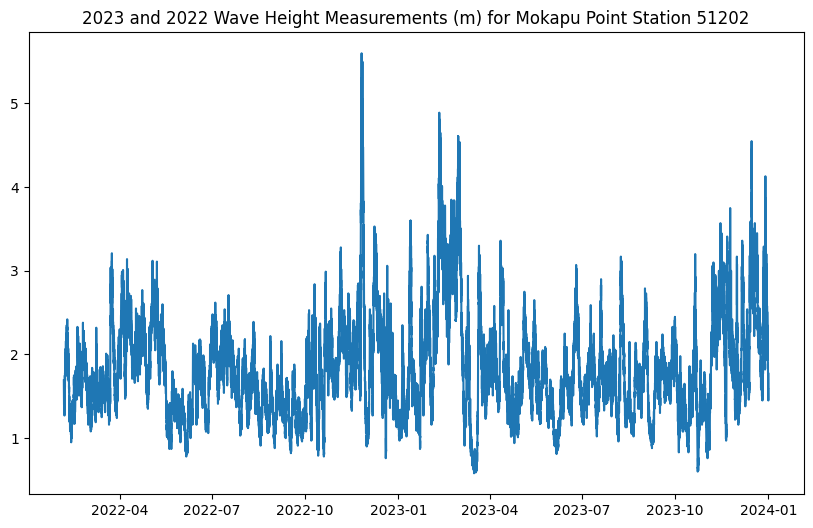

In [19]:
arima_data['WVHT'] = arima_data['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2023 and 2022 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data['WVHT']) # plotting our data

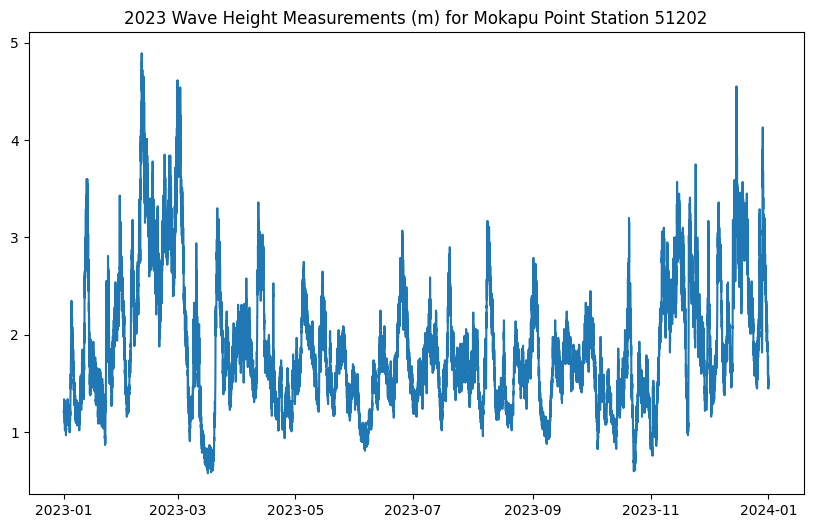

In [20]:
arima_data23['WVHT'] = arima_data23['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2023 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data23['WVHT']) # plotting our data

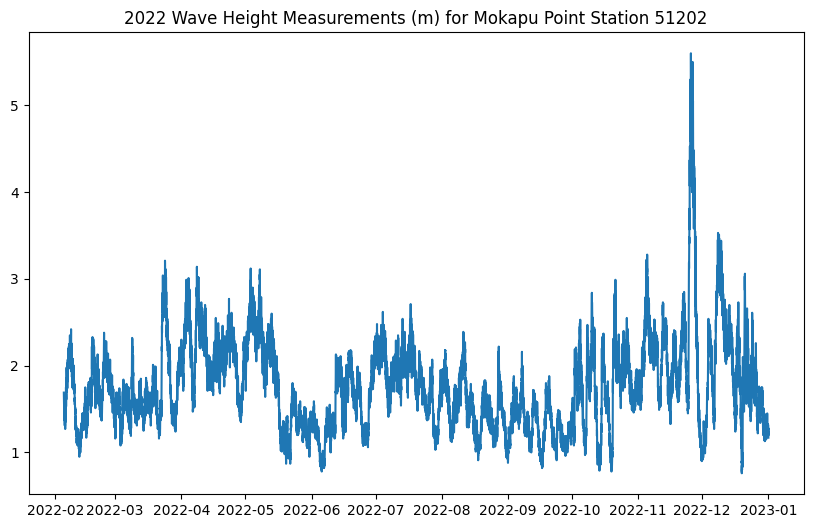

In [21]:
arima_data22['WVHT'] = arima_data22['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2022 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data22['WVHT']) # plotting our data

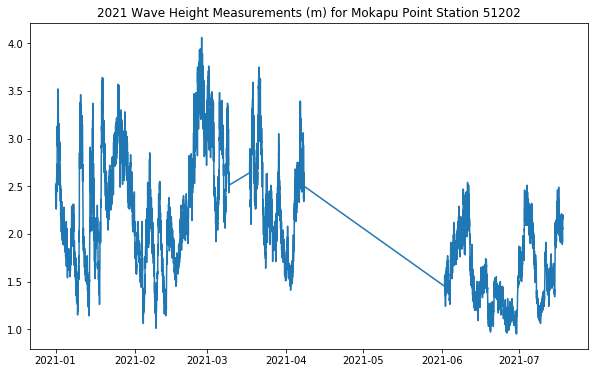

In [ ]:
arima_data21['WVHT'] = arima_data21['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2021 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data21['WVHT']) # plotting our data

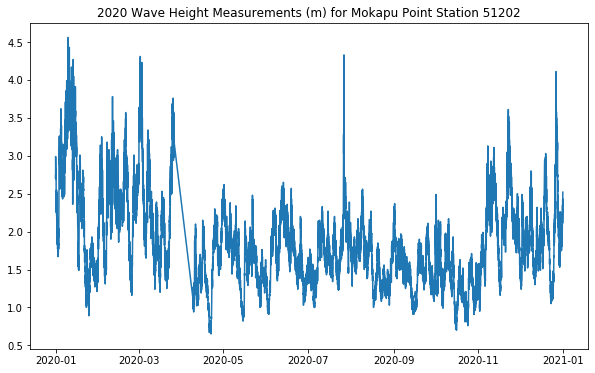

In [ ]:
arima_data20['WVHT'] = arima_data20['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2020 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data20['WVHT']) # plotting our data

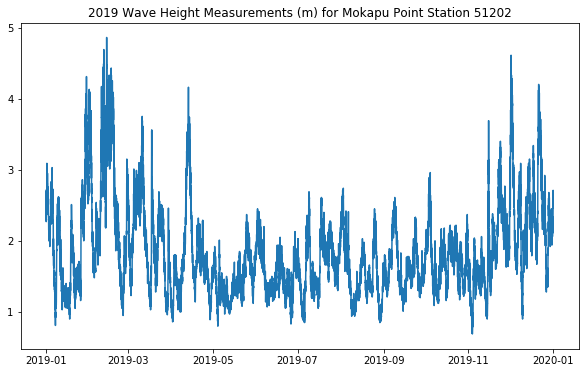

In [ ]:
arima_data19['WVHT'] = arima_data19['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2019 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data19['WVHT']) # plotting our data

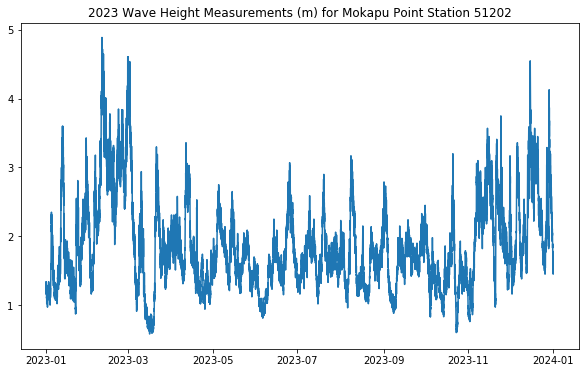

In [ ]:
arima_data17['WVHT'] = arima_data23['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2017 Wave Height Measurements (m) for Mokapu Point Station 51202') # setting up a title
plt.plot(arima_data23['WVHT']) # plotting our data

## Seasonality and Decomposition

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

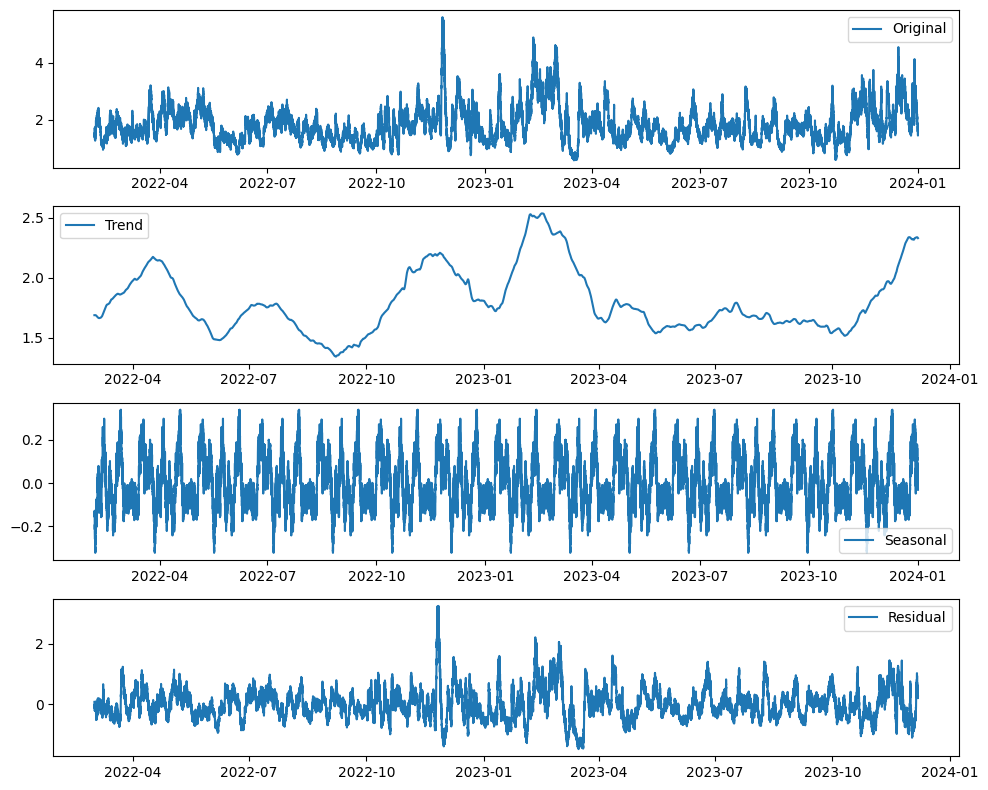

In [23]:
# Decompose time series
decomposition = seasonal_decompose(arima_data['WVHT'], model='additive', period=2400)

# Plot decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(arima_data.index, arima_data['WVHT'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(arima_data.index, decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(arima_data.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(arima_data.index, decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

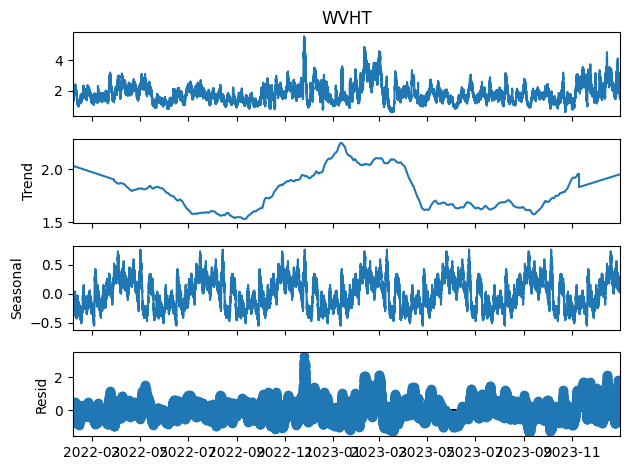

In [ ]:
decomposition = seasonal_decompose(arima_data['WVHT'], model = 'additive', extrapolate_trend='freq', period=5000)
decomposition.plot()
plt.show()

## Splitting Data for Training and Testing

For supervised machine learning, it's common to split your data for training and testing.

We'll be splitting our data 80-20, meaning 80% of our data will be used to train our ARIMA model while we use the other 20% to test how well our model did.

The training data will be stored in a new variable called *arima_train* while the testing data will be stored in *arima_test*.

In [24]:
arima_tts = arima_data['WVHT']
arima_train = arima_tts[:int(len(arima_data)*0.8)] # selecting 80% of arima_data for training
arima_test = arima_tts[int(len(arima_data)*0.8):] # selecting the last 20% of data for testing

Let's double check to make sure our train-test-split went smoothly (that the numbers add up).

In [25]:
print(len(arima_train)) # printing the length of arima_train
print(len(arima_test)) # printing the length of arima_test
print(len(arima_data)) # arima_train + arima_test should equal arima_data

26644
6662
33306


## ARIMA Parameters and Testing for Stationarity

ARIMA models have 3 parameters (p, q, d):

- AR = p (found from pacf plot)
- MA = q (found from acf plot)
- The number of differencing = d

------

In order to determine d, we need to figure out if our data is stationary.

Stationary means that your data has a constant mean, variance, and covariance that is independent of time. We can test for stationarity using the Augmented Dickey Fuller (ADF) test.

If your data is **NOT** stationary, we would need to difference it.


In [26]:
adf_test = adfuller(arima_data['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -10.964484557620258
P-value:  8.168769180455362e-20


If your p-value is > .05, your time series is not stationary.

If it is < .05, your time series is stationary.

Based on the p-value, our data is *not* stationary.

Because it is not stationary, we need to perform differencing (in order to figure out what the d parameter will be).

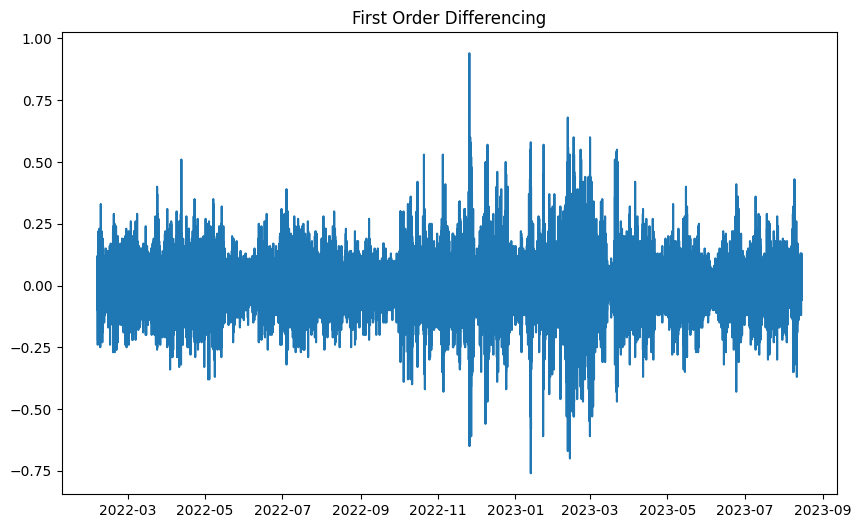

In [27]:
arima_train_diff = arima_train.diff().dropna() # first order differencing

plt.figure(figsize=(10, 6)) # setting up plot size
plt.title('First Order Differencing')
plt.plot(arima_train_diff) # plotting differencing results

Since we performed differencing *once*, our d parameter will be equal to 1. Now let's figure out p and q using autocorrelation and partial correlation plots.

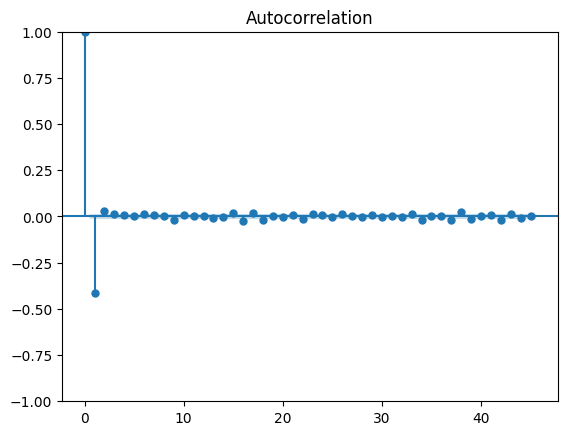

In [28]:
acf_plot = plot_acf(arima_train.diff().dropna()) # autocorrelation plot using training data

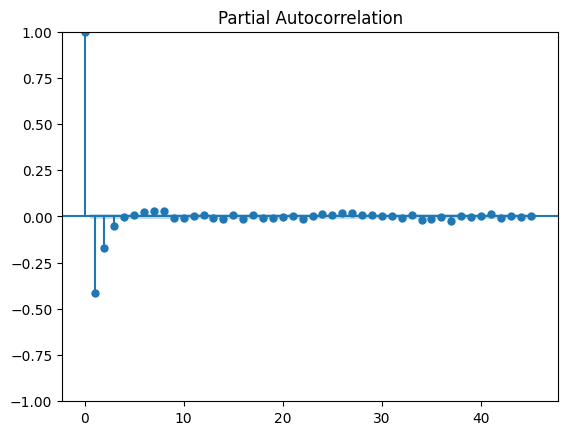

In [29]:
pacf_plot = plot_pacf(arima_train.diff().dropna()) # partial autocorrelation plot on training data

Based on this plot, we can see that 1 is significant, so p will equal 1.

Based on the acf_plot, it appears to tail off at 2, so we will use 2 for q.

Our parameters for now will be 1,2,1.

### Auto Arima

There's a cool function called auto_arima that is a statistical algorithm for determining the optimal parameters for ARIMA.

Running this code might take a minute.

In [ ]:
import pmdarima as pm # importing the package

auto_arima = pm.auto_arima(arima_train, stepwise = False, seasonal = False) # using auto arima on the training data

auto_arima # printing variable

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

Based on these results, the optimal parameters are 1,1,2 (we were close!). We'll use that instead when building out our ARIMA model.

## Building the Model

Below we use this code to build and print out the predicted and expected wave heights for the test.

This code might take a couple of minutes.

In [ ]:
waveheight_values = arima_data.WVHT
history = [x for x in arima_train]
predictions = list()
for t in range(len(arima_test)):
  model = ARIMA(history, order=(1,1,2)) # input the paramaters here within order=()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = arima_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.322999, expected=1.370000
predicted=1.346049, expected=1.290000
predicted=1.319137, expected=1.310000
predicted=1.313130, expected=1.330000
predicted=1.320383, expected=1.350000
predicted=1.335240, expected=1.270000
predicted=1.303348, expected=1.350000
predicted=1.324994, expected=1.250000
predicted=1.287669, expected=1.270000
predicted=1.276005, expected=1.270000
predicted=1.270437, expected=1.350000
predicted=1.308817, expected=1.350000
predicted=1.331750, expected=1.390000
predicted=1.364344, expected=1.320000
predicted=1.346364, expected=1.400000
predicted=1.374614, expected=1.400000
predicted=1.390434, expected=1.470000
predicted=1.433746, expected=1.550000
predicted=1.497955, expected=1.560000
predicted=1.537763, expected=1.520000
predicted=1.536881, expected=1.510000
predicted=1.527860, expected=1.550000
predicted=1.540974, expected=1.510000
predicted=1.527461, expected=1.530000
predicted=1.528882, expected=1.380000
predicted=1.453664, expected=1.450000
predicted=1.

# Saving and loading ARIMA model

## Saving your ARIMA Model using the Pickle Method

In this section, we'll be saving our trained model so that we can use it in the future without running through building and training it again.

First step is to make sure you've mounted your Google Drive (or connected it)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

We use the pickle method to serialize the Python object (in other words, store our ARIMA model into something we can download).

In [ ]:
import pickle # package used to pickle
from statsmodels.tsa.arima.model import ARIMA # ARIMA model package

Now, we use the function pickle.dump to save our ARIMA model in a pickle binary file called 'arima_model.pkl'.

The name of your model should be the first argument in the pickle.dump function.

In [ ]:
with open('arima_model.pkl', 'wb') as file:
  pickle.dump(model_fit, file) # change model_fit to the name of your model

After your created your binary file 'arima_model.pkl', we're going to download it to our local computer.

In [ ]:
from google.colab import files

files.download('arima_model.pkl')

Check your downloads - your model should be there after running the above code chunk!

## Loading and Using your ARIMA Model

Now that we have our downloaded model on our computer, we're going to upload it back into Google Collab.

You should do the following steps every time you want to use your ARIMA model when you connect to a new runtime.

When you run the code below, a button that asks you to Choose Files should pop up. Upload your downloaded ARIMA model or arima_model.pkl.

In [ ]:
uploaded = files.upload()

Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving arima_model.pkl to arima_model.pkl
Now that it's uploaded into your Google Collab environment, we're going to "unpickle" and load it in.

We store the model in a variable called loaded_model.

In [ ]:
with open ('arima_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

Test out your loaded model!

Run the following code to forecast wave heights for the next 10 steps. You should get an array with the results.

After loading your model, if you want to use it within your codel, it is now called loaded_model.

In [ ]:
forecast = loaded_model.forecast(steps=10)
print(forecast)

## Visualization

After the model completes its forecast, create a plot to visualize the difference between the predicted values and expected vales for wave heights.

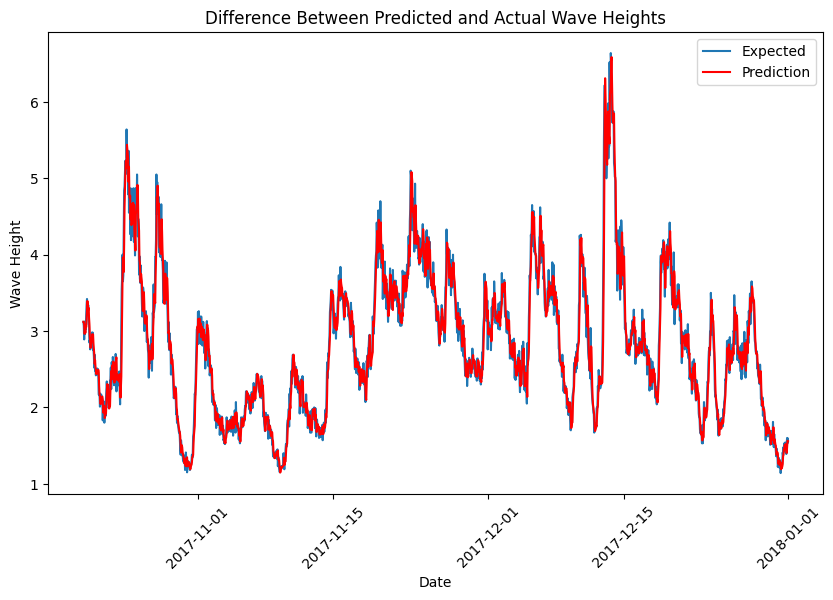

In [ ]:
test_x = arima_test.index # creating an index variable so that it's the dates

plt.figure (figsize=(10,6)) # setting up the plot size

plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot

plt.xticks(rotation=45) # rotating the x labels for better visualization

plt.show()

In [ ]:
train_x = arima_train.index # creating an index variable for training
test_x = arima_test.index # creating an index variable for testing

plt.figure (figsize=(10,6)) # setting up the plot size

plt.plot(train_x, arima_train, color = 'green', label = 'Training') # plotting training values
plt.plot(test_x, arima_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot

plt.xticks(rotation=45) # rotating the x labels for better visualization

plt.show()

In [ ]:
import plotly.graph_objects as go

# Assuming arima_train, arima_test, and predictions are Pandas Series with datetime index
train_x = arima_train.index
test_x = arima_test.index
fig = go.Figure()

# Add traces for training, expected, and predicted values
fig.add_trace(go.Scatter(x=train_x, y=arima_train, mode='lines', name='Training', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test_x, y=arima_test, mode='lines', name='Expected', line=dict(color = 'blue')))
fig.add_trace(go.Scatter(x=test_x, y=predictions, mode='lines', name='Prediction', line=dict(color='red')))

# Update layout for better visualization
fig.update_layout(
    title='Difference Between Predicted and Actual Wave Heights',
    xaxis_title='Date',
    yaxis_title='Wave Height',
    legend_title='Legend',
    xaxis=dict(tickangle=45),
    autosize=False,
    width=1000,
    height=600,
)
# Show the plot
fig.show()

## Model Evaluation

In machine learning, there are different ways to evaluate how well your model performed depending on what type of model you use.

For this project, we'll use mean absolute error and root squared value to determine how well our model did.

You can review this [resource](https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/) to understand the metrics better.

In [ ]:
mae = mean_absolute_error(arima_test, predictions) # calculating mean absolute error
r_sq = r2_score(arima_test, predictions) # calculating root squared value
print('Test MAE: ', mae)
print('Test R^2: ', r_sq)

Test MAE:  0.15436457153586647
Test R^2:  0.947866143959432


In [ ]:
from sklearn.metrics import mean_squared_error

print(f'AIC: {model_fit.aic}')
print(f'BIC: {model_fit.bic}')

In [ ]:
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(residuals)
ax[0].set_title('Residuals')
ax[1].hist(residuals, bins=30)
ax[1].set_title('Residuals Histogram')
plt.show()

Based on these results and the visualization, this model did pretty good!

## Forecasting

In [ ]:
forecast_steps = 144

forecast = model_fit.forecast(steps = forecast_steps)

forecast_dates = pd.date_range(start=waveheight_values.index[-1], periods=forecast_steps + 1, closed = 'right')

In [ ]:
# Plotting the results
plt.figure(figsize=(10,6))  # Setting up the plot size

# Plotting the entire wave height series
plt.plot(waveheight_values.index, waveheight_values, label='Observed')

# Plotting the forecasted values
plt.plot(forecast_dates, forecast, color='red', label='Forecasted')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Wave Height Forecast')
plt.legend()  # Adding a legend to the plot

# Rotating x-axis labels for better visualization
plt.xticks(rotation=45)

# Displaying the plot
plt.show()